In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:/Users/SRISTI/Desktop/practice text doc/customer_churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
pd.set_option('display.max_column',None)

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
ds=data.copy()

## EDA

First we drop the customerID which we do not required.

In [6]:
ds.drop('customerID',axis=1,inplace=True)

In [7]:
ds.shape

(7043, 20)

Dataset has 7043 rows and 20 columns after removing one column.

In [8]:
ds.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


All the columns are object type except 3 columns in which 2 are int type 1 is float type.
everything is ok but totalcharges which is numerical column it should not be object type, it must be float or int type.
we will analyse it.

In [10]:
ds.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Dataset has no null values.

In [11]:
for i in ds.columns:
    if ds[i].dtypes=='object':
        print(i)
        print(ds[i].unique())

gender
['Female' 'Male']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn
['No' 'Yes']


First we have to handle total charges column.

In [12]:
ds.loc[ds['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are some columns present which do not have any value instead of this it contains space which is like string/character in python so that is why this column is given as object type.

We should replace this rows with nan value so that we can process further.

In [13]:
ds['TotalCharges']=ds['TotalCharges'].replace(' ',np.nan)

In [14]:
ds.loc[ds['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Here we can see that there is no column left which previously have spaces.

In [15]:
ds.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There is 11 nan value present after replacing space.
Now, we can remove null value with a suitable value.
Lets decide this after knowing column distribution.

### Univariate Analysis

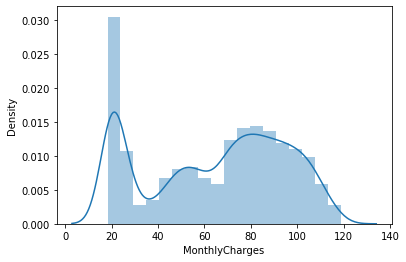

In [16]:
sns.distplot(ds['MonthlyCharges'])

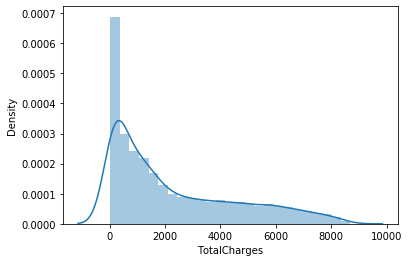

In [17]:
sns.distplot(ds['TotalCharges'])

Total charges column is righly skewed, its not normally distributed soo we replace nan value with its median.

In [18]:
# first convert it into float type from object type.

ds['TotalCharges']=ds['TotalCharges'].astype(float)

In [19]:
ds['TotalCharges']=ds['TotalCharges'].fillna(ds['TotalCharges'].median())

In [20]:
ds.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now, there is not null value present.

In [21]:
ds.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Male      3555
Female    3488
Name: gender, dtype: int64


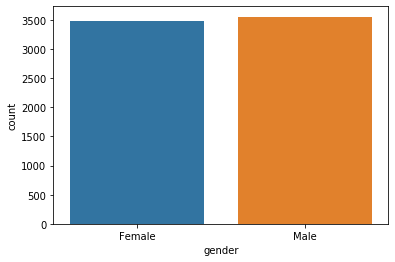

No     3641
Yes    3402
Name: Partner, dtype: int64


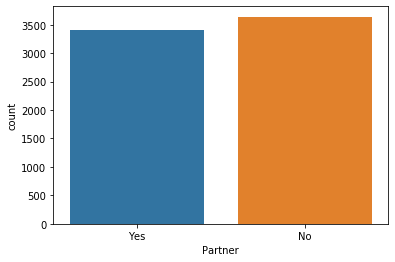

No     4933
Yes    2110
Name: Dependents, dtype: int64


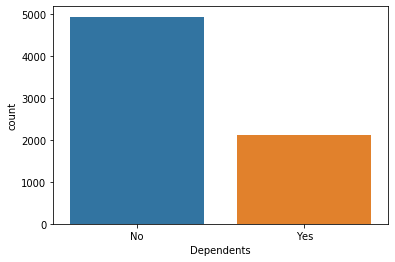

Yes    6361
No      682
Name: PhoneService, dtype: int64


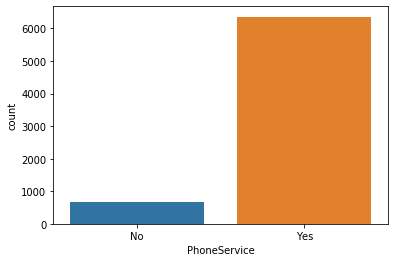

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


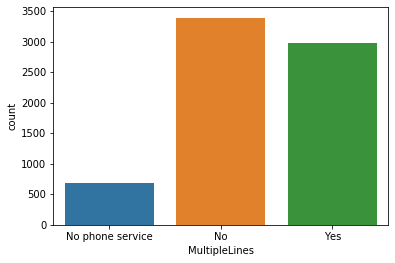

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


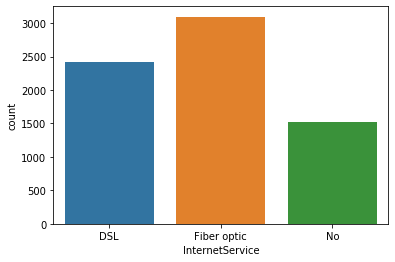

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


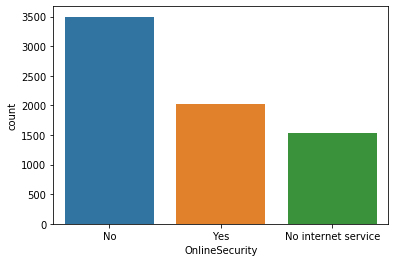

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


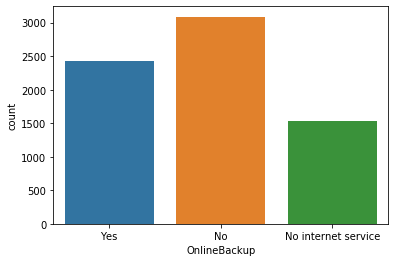

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


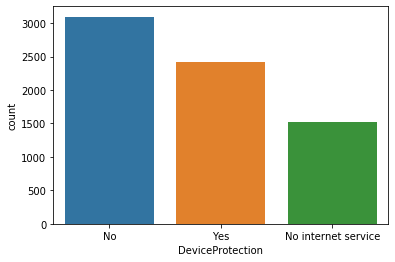

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


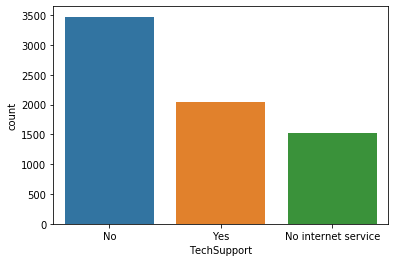

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


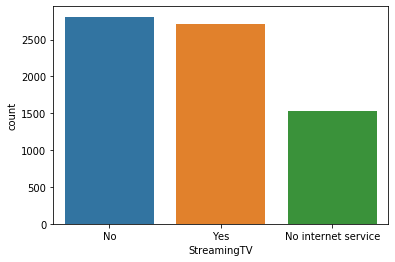

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


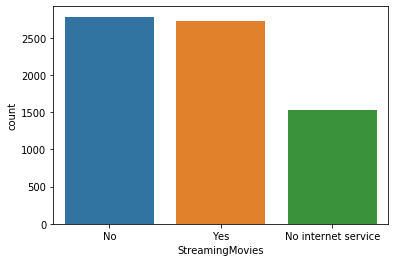

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


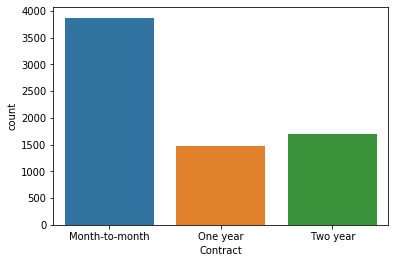

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


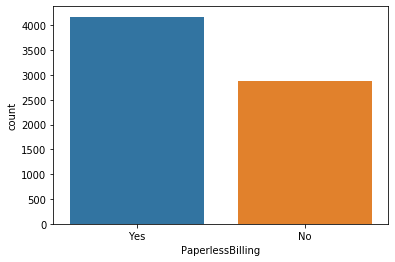

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


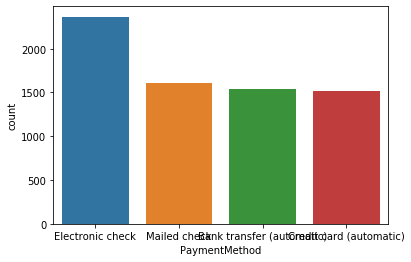

No     5174
Yes    1869
Name: Churn, dtype: int64


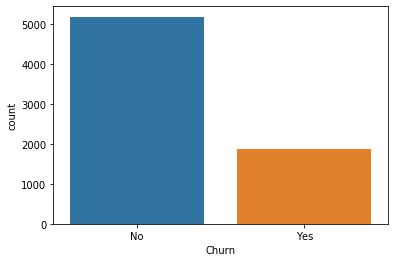

In [22]:
for i in ds.columns:
    if ds[i].dtypes=='object':
        print(ds[i].value_counts())
        sns.countplot(ds[i])
        plt.show()

Male customers are little more than the female customer.
Without partner customer are more than the with partner customer.
Independent customer are more than dependent customer.
Customers are more who had phone service.
Maximum customer are who do not have multiple lines.
Maximum customer took Internet service which is distributed through fiber optic.
Maximum customer do not take any online security.
Maximum customer do not have any online backup.
Maximum customer took contract for month to month rather than one year and two year.
Maximum customer do paperless billing.
Electronic check is the most prefered by the customers.
Most of the customers not willing to churn.
Lastly our target column is imbalanced, we will handle it later.

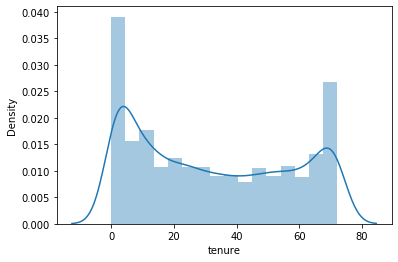

In [23]:
sns.distplot(ds['tenure'])

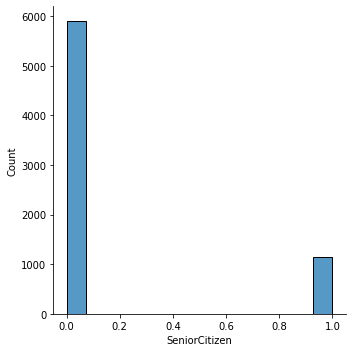

In [24]:
sns.displot(ds['SeniorCitizen'])

Very less number of the customers are senior citizen.

### Bivariate Analysis

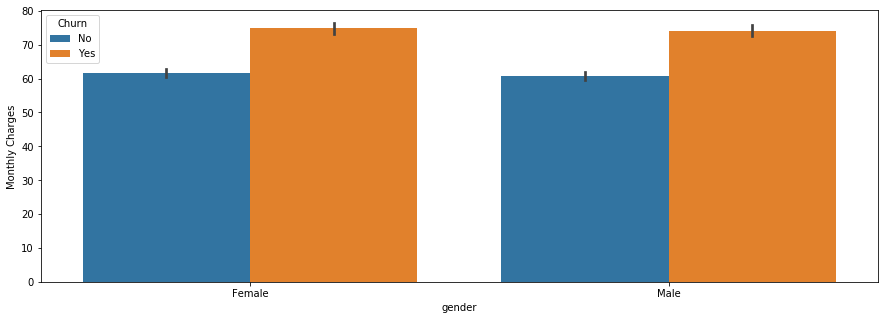

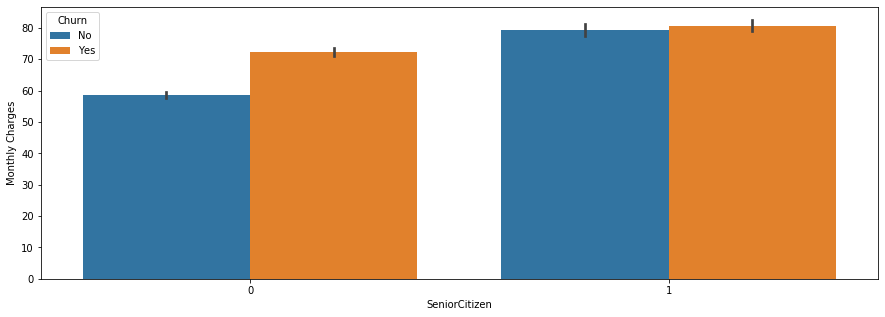

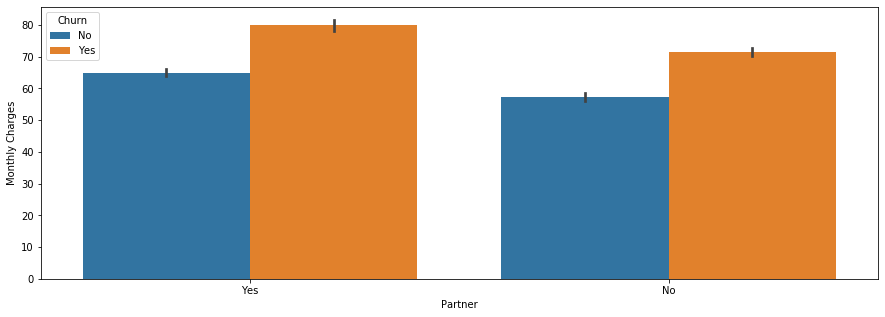

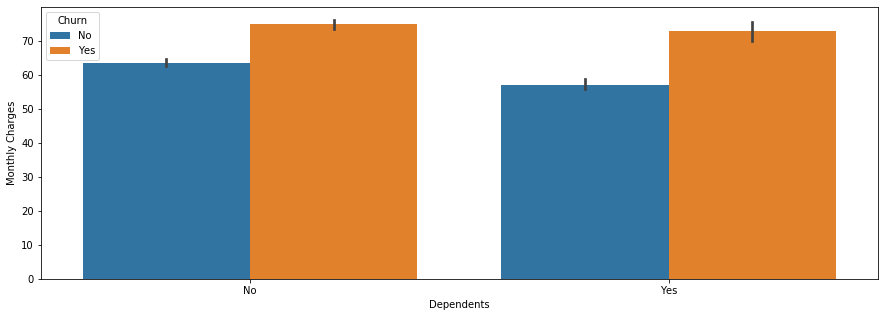

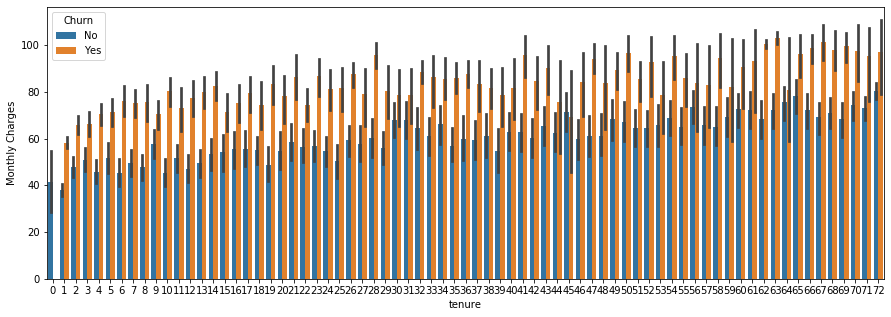

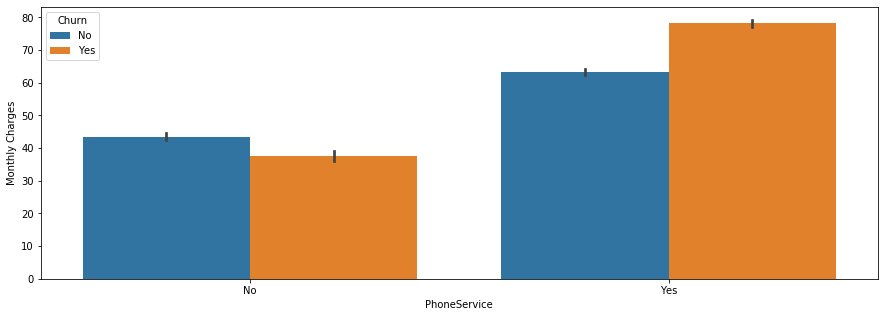

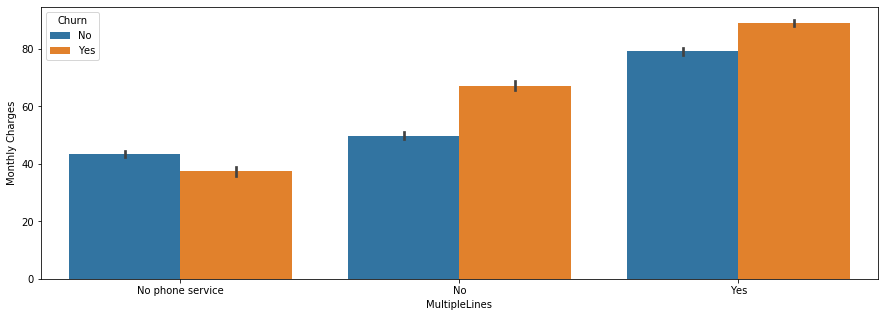

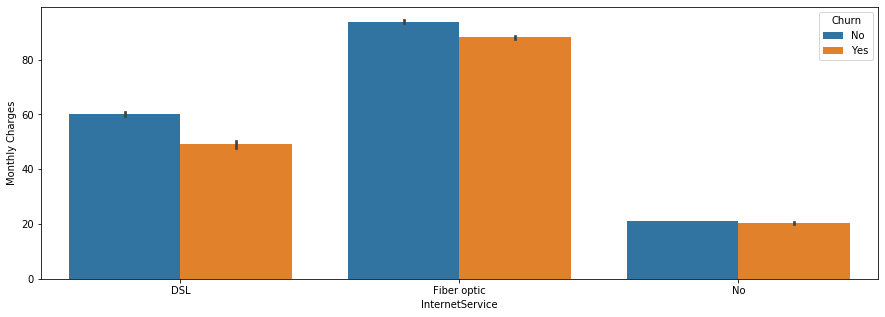

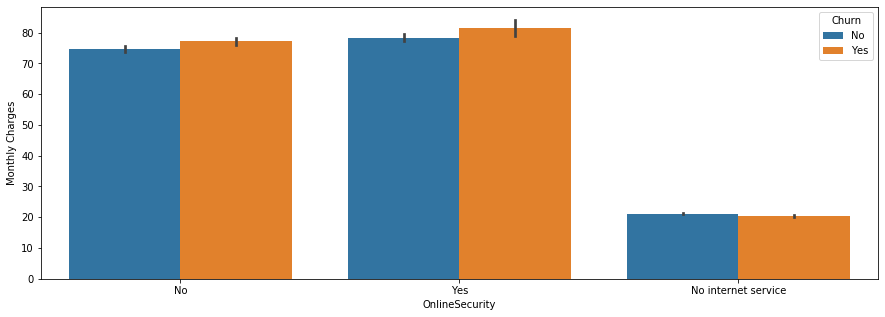

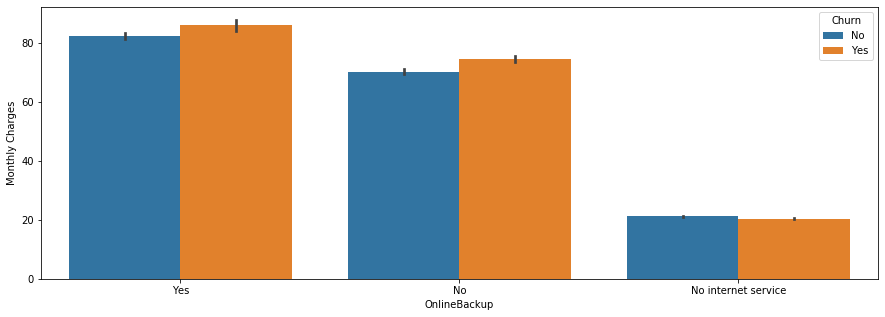

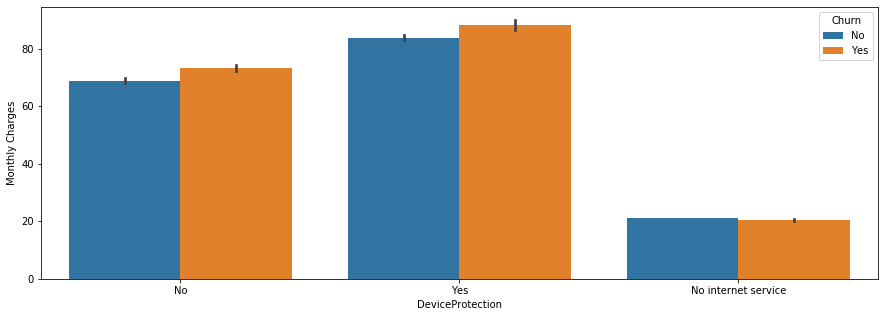

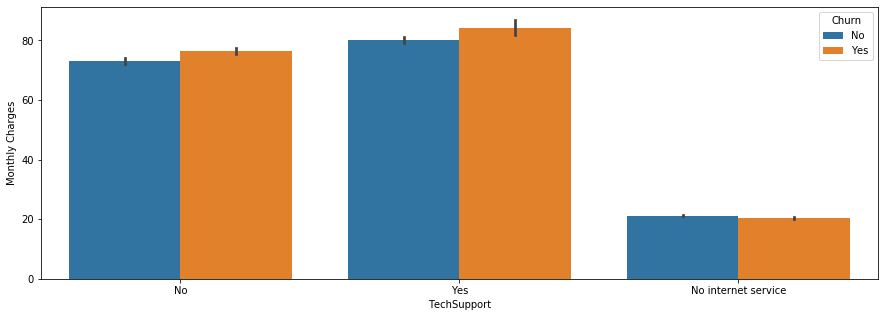

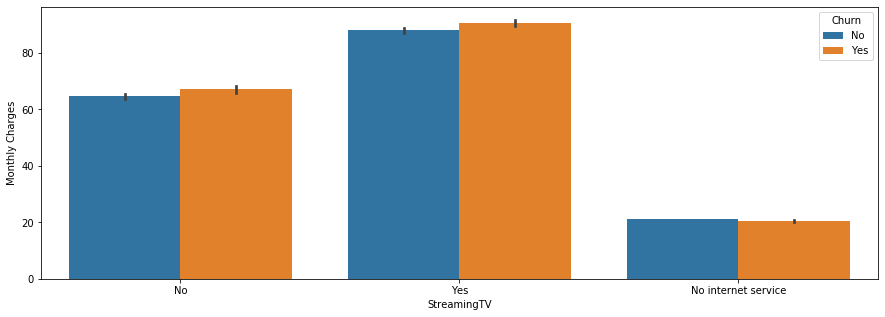

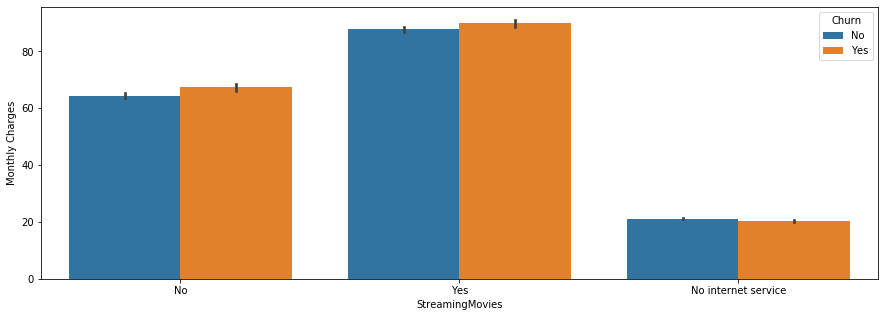

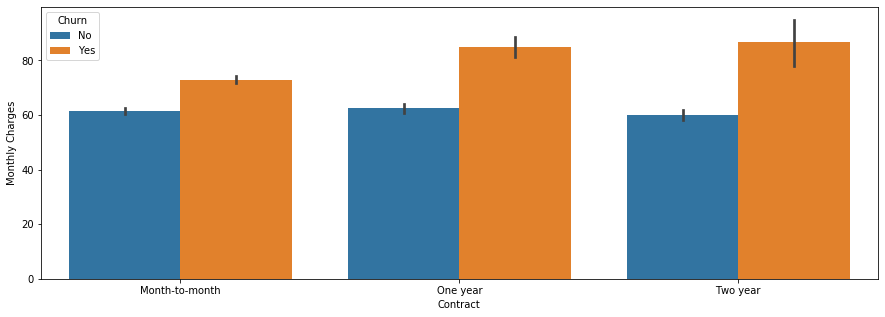

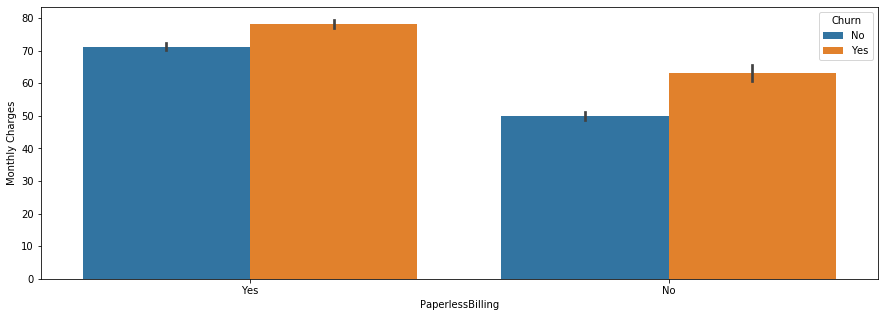

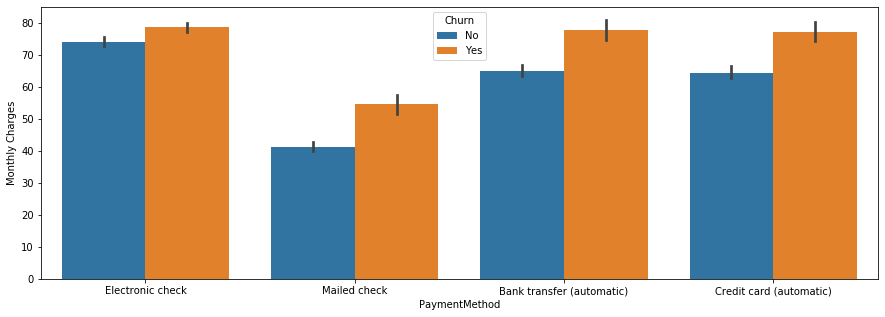

In [25]:
for i in ds.iloc[:,:-3].columns:
    plt.figure(figsize=(15,5))
    sns.barplot(x=i,y='MonthlyCharges',data=ds,hue='Churn')
    plt.xlabel(i)
    plt.ylabel('Monthly Charges')
    plt.show()

We can see that there is no difference between male and female who are willing to churn having high monthly charges.
there is not much difference that someone is senior citizen or not but if they are feel monthly charges are high, they are willing to churn.
Same case for partner and dependent also they are likely to churn if they feel monthly charges is too high.
It seems whatever will be the tenure churning of customer always heppen because of high charges.
Who have multiple lines are likely to churn less as compare to who do not have, because mothly charges for single line would be costly.
Owning fiber optic one are less likely to churn as compare to DSL.
contract with two years are more prone to churn however their monthly charges are less than other contracts.
Bank transfer and credit card who use these methods to pay are likely to churn more however their monthly charges are less as compare to Electronic check.

### Encoding

In [26]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
oen=OrdinalEncoder()
lec=LabelEncoder()

In [27]:
for i in ds.iloc[:,0:-1].columns:
    if ds[i].dtypes=='object':
        ds[i]=oen.fit_transform(ds[i].values.reshape(-1,1))

In [28]:
ds['Churn']=lec.fit_transform(ds['Churn'].values.reshape(-1,1))

In [29]:
ds.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1


In [30]:
ds.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Most of columns have less difference between mean and std , it means data is not much skewed and likely to be a normally distributed. 

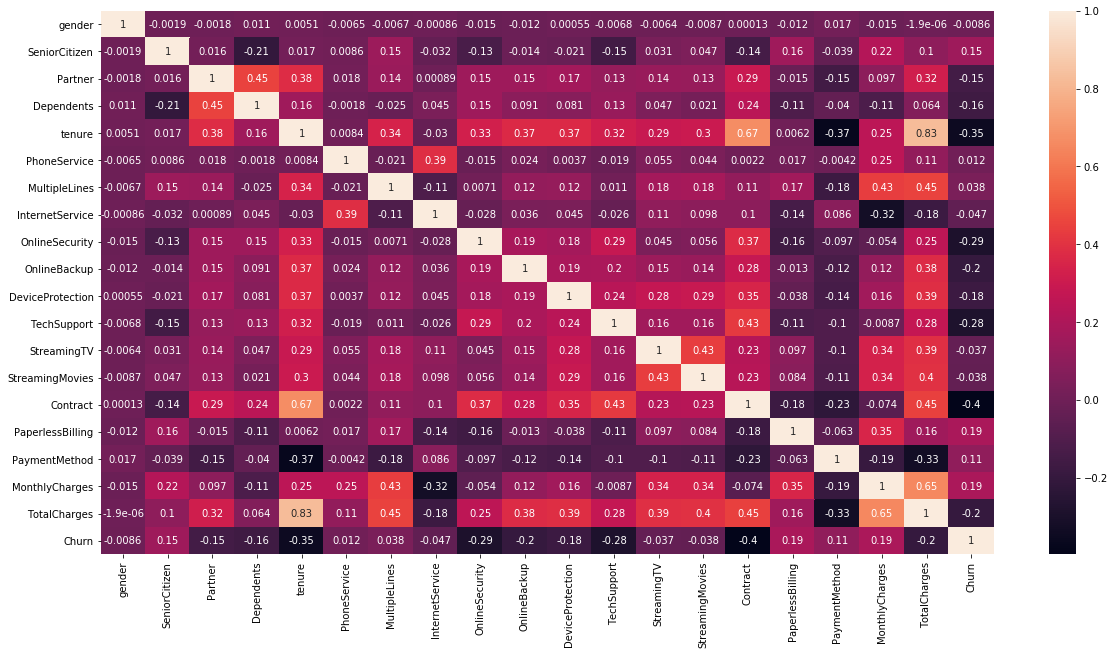

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(ds.corr(),annot=True)

Partner and Dependents columns are lightly correlated to each other.
Contract and Tenure are quite good correlated to each other.
Total charges and Tenure are highly correlated to each other.
Multiplelines, MonthlyCharges and TotalCharges are also quite correlated to each others.
TotalChargesa nd MonthlyCharges are good correlated to each other.

### Checking for the outliers

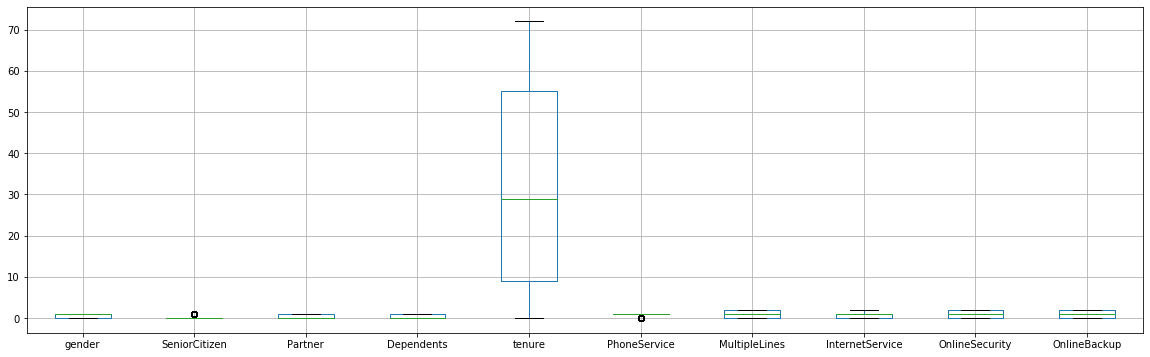

In [32]:
ds.iloc[:,0:10].boxplot(figsize=(20,6))

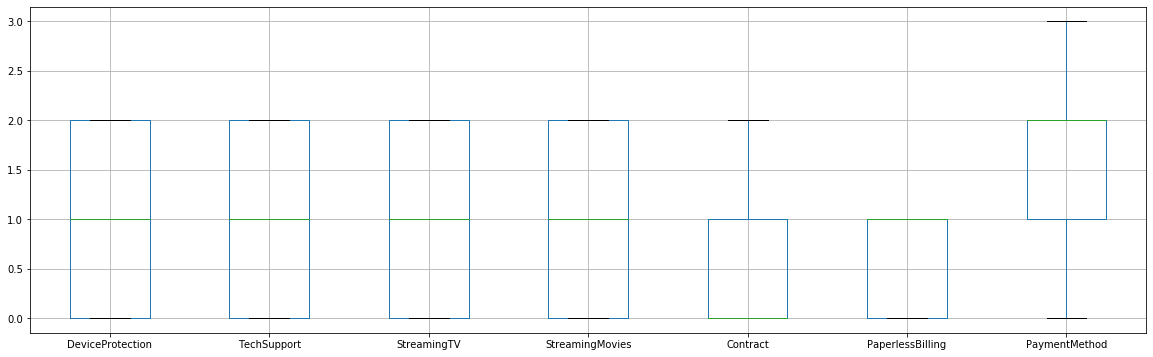

In [33]:
ds.iloc[:,10:-3].boxplot(figsize=(20,6))

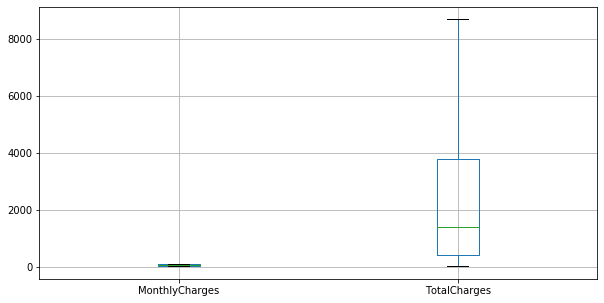

In [34]:
ds.iloc[:,17:-1].boxplot(figsize=(10,5))

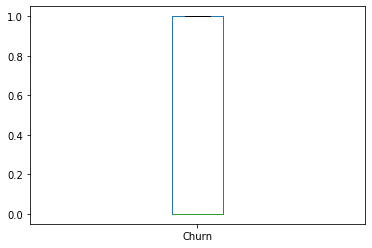

In [35]:
ds['Churn'].plot.box()

There are only two column SeniorCitizen and PhoneService which have outliers but not much.
But we are not going to remove outliers since these columns are categorical type.

### Checking for skewness

In [36]:
ds.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
Churn               1.063031
dtype: float64

There are few columns which are skewed such as SeniorCitizen, Dependents, PhoneService, Contract, TotalCharges, Churn.
But these are either categorical columns or target column except TotalCharges.
So we are not going to remove skewness from categorical and target columns.
But we try to remove skewness from TotalCharges.

In [37]:
#ds['TotalCharges']=np.sqrt(ds['TotalCharges'])

In [38]:
#ds.skew()

In [39]:
# Skewness is removed, Now we can process further.

After removing the skewness TotalCharges becomes very less with its respective row of  MonthlyCharges .
Logically, it can not possible that Monthlycharges are geater than TotalCharges, So we should not remove the skewness.

### Spliting the data

In [41]:
x1=ds.drop('Churn',axis=1)
x1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65


In [42]:
y=ds['Churn'].copy()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

### Handling the class imbalance problem by oversampling the minority class

In [43]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [44]:
x1,y=sm.fit_resample(x1,y)

In [45]:
y.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

Now our target column has balance categories in it.

In [46]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [47]:
x=mms.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330


### Finding the best Random State

In [58]:
maxacc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc_sc=accuracy_score(y_test,pred)
    if acc_sc>maxacc:
        maxacc=acc_sc
        maxrs=i
print('best acc_sc is:',maxacc,' at random state', maxrs)

best acc_sc is: 0.8323671497584542  at random state 166


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=166)

In [60]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8278, 19) (2070, 19) (8278,) (2070,)


### Models Training

In [61]:
lgit=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
adc=AdaBoostClassifier()

In [62]:
model=(lgit,dtc,svc,knc,rfc,adc)

for i in model:
    print("Model",i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('accuracy_score',accuracy_score(y_test,pred))
    print('confusion_matrix',confusion_matrix(y_test,pred))
    print('clasification_report',classification_report(y_test,pred))
    score=cross_val_score(i,x,y,cv=5)
    print(score.mean())
    print('\n')

Model LogisticRegression()
accuracy_score 0.7724637681159421
confusion_matrix [[753 278]
 [193 846]]
clasification_report               precision    recall  f1-score   support

           0       0.80      0.73      0.76      1031
           1       0.75      0.81      0.78      1039

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070

0.7732926592930376


Model DecisionTreeClassifier()
accuracy_score 0.8241545893719807
confusion_matrix [[836 195]
 [169 870]]
clasification_report               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1031
           1       0.82      0.84      0.83      1039

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

0.7946607733671428


Model SVC()
accuracy_score 0.8333333333333334
confusion_

On the basis of above scores(accuracy_score and cross_val_score), we choose few models for hyperparameter.
we drop decision tree for highest difference between accuracy_score and cross_val_score as compare to other model.
Rest of the model we choosed.

We also try to train our model without handling class imbalance but accuracy score was quite low that is why we choose to go with after handling class imbalance.

### Hyperparameter Tuning using GridSearchCV

In [53]:
# 1. FOR LOGISTIC REGRESSION

parameters={'C':np.arange(1,10),'penalty':['l1','l2','elasticnet'],'max_iter':[100,120,150,180,200],'n_jobs':[-1]}
gs=GridSearchCV(lgit,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_iter': [100, 120, 150, 180, 200], 'n_jobs': [-1],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [54]:
gs.best_params_

{'C': 9, 'max_iter': 100, 'n_jobs': -1, 'penalty': 'l2'}

In [64]:
lg=LogisticRegression(C=8,penalty='l2',max_iter=100,n_jobs=-1)
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predlg))
print('confusion_matrix',confusion_matrix(y_test,predlg))
print('clasification_report',classification_report(y_test,predlg))

accuracy_score 0.7724637681159421
confusion_matrix [[753 278]
 [193 846]]
clasification_report               precision    recall  f1-score   support

           0       0.80      0.73      0.76      1031
           1       0.75      0.81      0.78      1039

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



In [65]:
# FOR SVC

parameters={'kernel':['linear','rbf','poly','sigmoid'],'C':[0.01,0.1,0.02,1.0],'probability':[True],'gamma':['scale','auto']}

gs=GridSearchCV(svc,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.02, 1.0],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'probability': [True]})

In [66]:
gs.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}

In [67]:
sv=SVC(kernel='rbf',probability=True,C=1.0,gamma='scale')
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predsv))
print('confusion_matrix',confusion_matrix(y_test,predsv))
print('clasification_report',classification_report(y_test,predsv))

accuracy_score 0.8333333333333334
confusion_matrix [[870 161]
 [184 855]]
clasification_report               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1031
           1       0.84      0.82      0.83      1039

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



In [68]:
# FOR KNEIGHBORS CLASSIFIER

parameters={'n_neighbors':np.arange(1,10),'weights':['uniform','distance'],'n_jobs':[-1]}

gs=GridSearchCV(knc,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [69]:
gs.best_params_

{'n_jobs': -1, 'n_neighbors': 1, 'weights': 'uniform'}

In [70]:
kn=KNeighborsClassifier(n_jobs=-1,n_neighbors=1,weights='uniform')
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predkn))
print('confusion_matrix',confusion_matrix(y_test,predkn))
print('clasification_report',classification_report(y_test,predkn))

accuracy_score 0.8043478260869565
confusion_matrix [[773 258]
 [147 892]]
clasification_report               precision    recall  f1-score   support

           0       0.84      0.75      0.79      1031
           1       0.78      0.86      0.81      1039

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



In [71]:
# FOR RANDOM FOREST CLASSIFIER

parameters={'n_estimators':(100,150,180,200),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

gs=GridSearchCV(rfc,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': (100, 150, 180, 200)})

In [72]:
gs.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}

In [73]:
rf=RandomForestClassifier(criterion='entropy',max_features='sqrt',n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predrf))
print('confusion_matrix',confusion_matrix(y_test,predrf))
print('clasification_report',classification_report(y_test,predrf))

accuracy_score 0.8632850241545894
confusion_matrix [[918 113]
 [170 869]]
clasification_report               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1031
           1       0.88      0.84      0.86      1039

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



In [74]:
# FOR ADABOOST CLASSIFIER

parameters={'n_estimators':[50,100,150,180,200],'learning_rate':[0.0001,0.001,0.01,0.1,1.0],'algorithm':['SAMME','SAMME.R']}
gs=GridSearchCV(adc,parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150, 180, 200]})

In [75]:
gs.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 180}

In [76]:
ad=AdaBoostClassifier(algorithm='SAMME.R',learning_rate= 1.0,n_estimators=180)
ad.fit(x_test,y_test)
predad=ad.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predad))
print('confusion_matrix',confusion_matrix(y_test,predad))
print('clasification_report',classification_report(y_test,predad))

accuracy_score 0.8748792270531401
confusion_matrix [[905 126]
 [133 906]]
clasification_report               precision    recall  f1-score   support

           0       0.87      0.88      0.87      1031
           1       0.88      0.87      0.87      1039

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



Now, according to accuracy score we drop logistic regression and rest of them are going for auc roc curve and score.

### AUC ROC CURVE AND SCORE

In [77]:
from sklearn.metrics import roc_auc_score,roc_curve

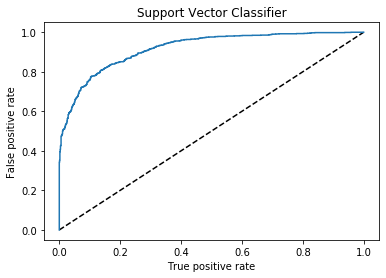

In [78]:
# FOR SVC

pred_prob=sv.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Support Vector Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Support Vector Classifier')
plt.show()

In [79]:
auc_score=roc_auc_score(y_test,predsv)
auc_score

0.8333737860678915

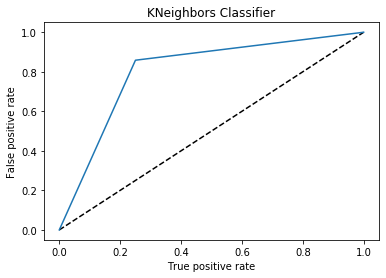

In [80]:
# FOR KNEIGHBORS CLASSIFIER

pred_prob=kn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighbors Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('KNeighbors Classifier')
plt.show()

In [81]:
auc_score=roc_auc_score(y_test,predkn)
auc_score

0.8041376612780511

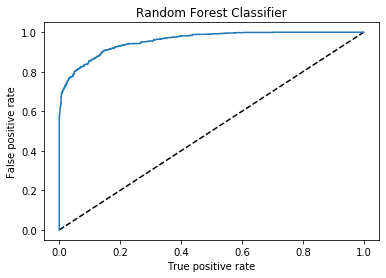

In [82]:
# RANDOM FOREST CLASSIFIER

pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [83]:
auc_score=roc_auc_score(y_test,predrf)
auc_score

0.8633894039351798

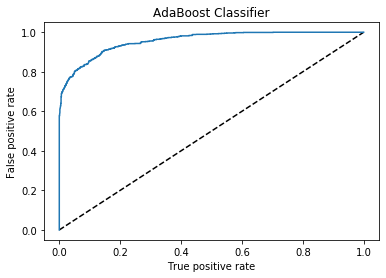

In [84]:
# ADABOOST CLASSIFIER

pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('AdaBoost Classifier')
plt.show()

In [85]:
auc_score=roc_auc_score(y_test,predad)
auc_score

0.8748904275449516

So,on the basis of roc_auc_score adaboost classifier works well having 87.48% of accuracy.
Therefore it will be our final model.

### Saving our Final Model

In [86]:
import joblib

In [87]:
joblib.dump(ad,'Customer_Churn_ad.obj')

['Customer_Churn_ad.obj']